In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

<h3>Imports</h3>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
path = "/workspaces/ML-Models/Flora Classification/dataset/IRIS.csv"
df = pd.read_csv(path)

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.shape

(150, 5)

In [7]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [12]:
X=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [13]:
y = df['species']

In [14]:
print(f'''
    Dependent Variables Shape: {X.shape}
    Target Variable Shape: {y.shape}
''')


    Dependent Variables Shape: (150, 4)
    Target Variable Shape: (150,)



<h3>Pair Plot</h3>

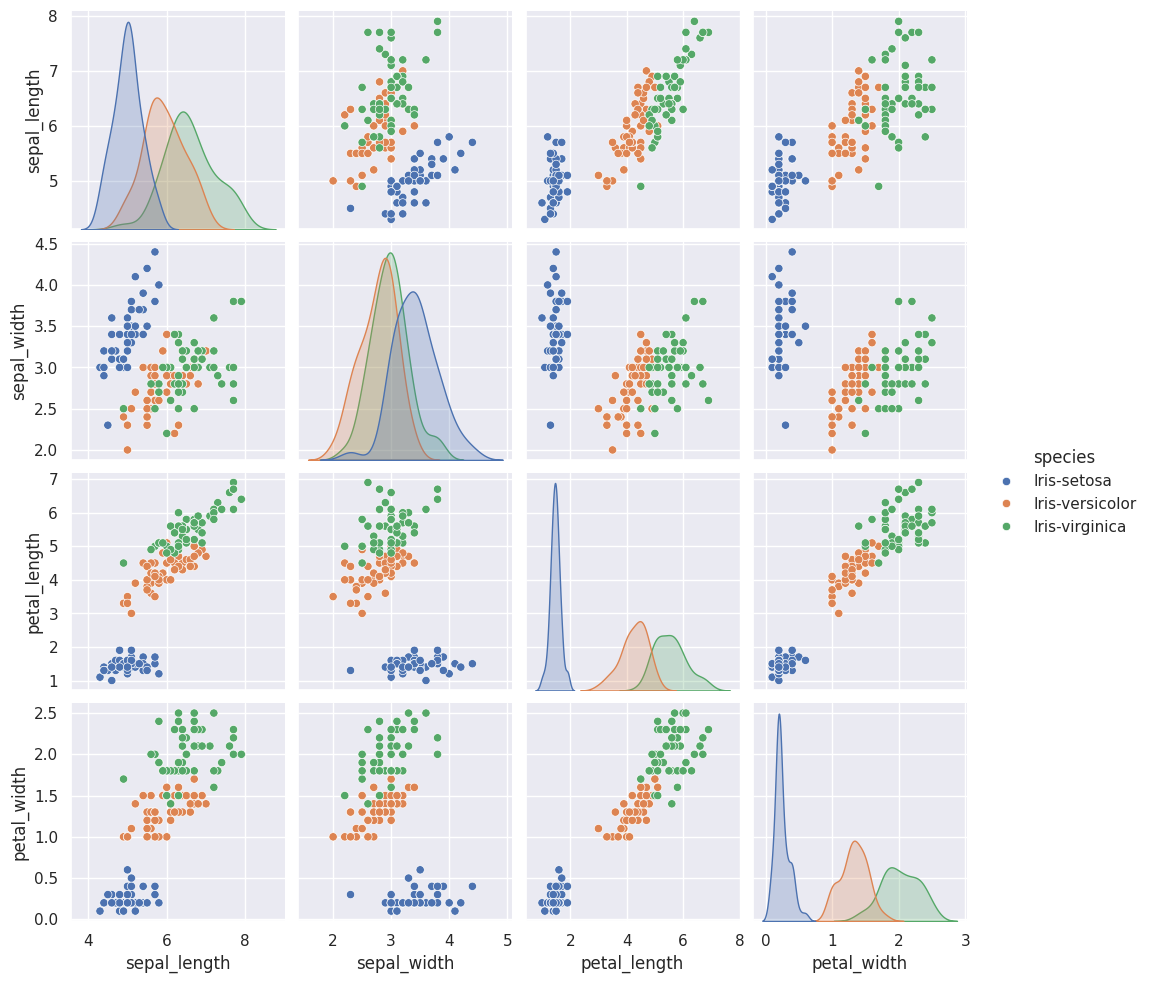

In [15]:
#pairplot - to visualize the relationships between different pairs of features
sns.set(style="darkgrid")
sns.pairplot(df, hue="species")

<h3>Heat Map</h3>

<Axes: >

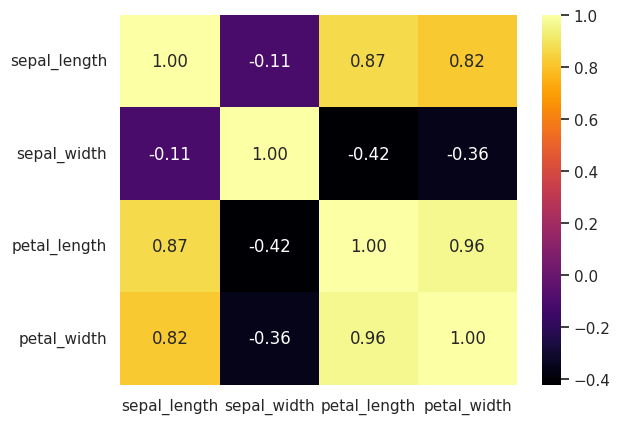

In [16]:
#correlation Heatmap: -Visualize correlation between features
corr_matrix = X.corr()
sns.heatmap(corr_matrix,annot=True,cmap='inferno',fmt='.2f')

<h3>Boxplot</h3>

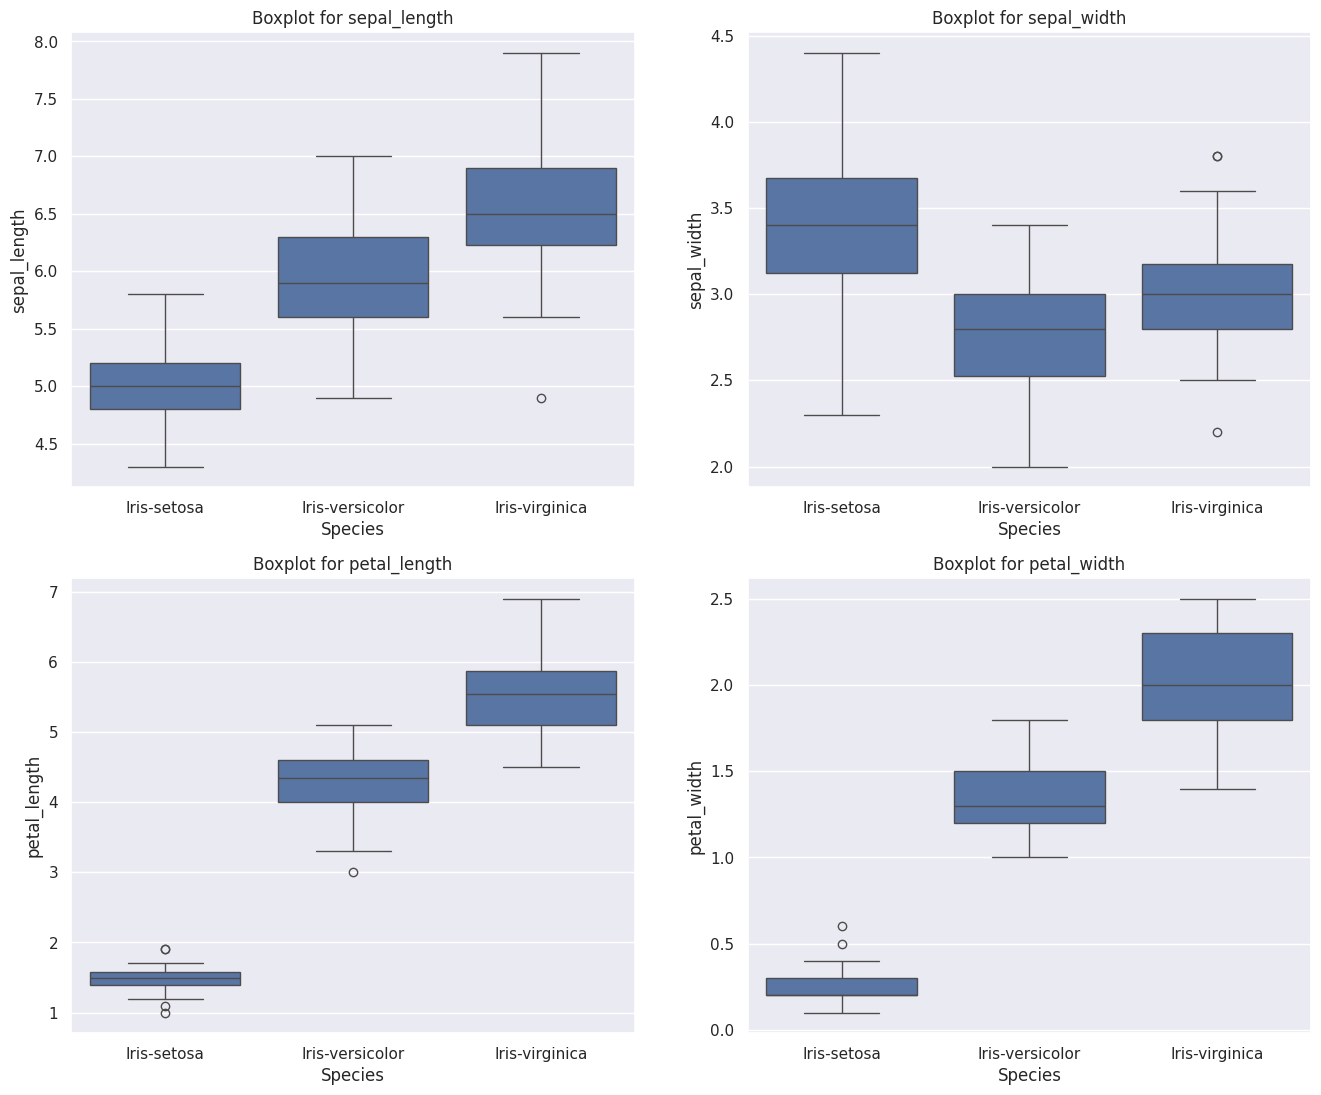

In [17]:
#Boxplots: Visualizes distribution of data and highlights outliers
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(16,13))
axes=axes.flatten()
for i,col in enumerate(X.columns):
    sns.boxplot(x='species',y=col,data=df,ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')
    axes[i].set_xlabel('Species')
    axes[i].set_ylabel(col)

<h3>Violin Plot</h3>

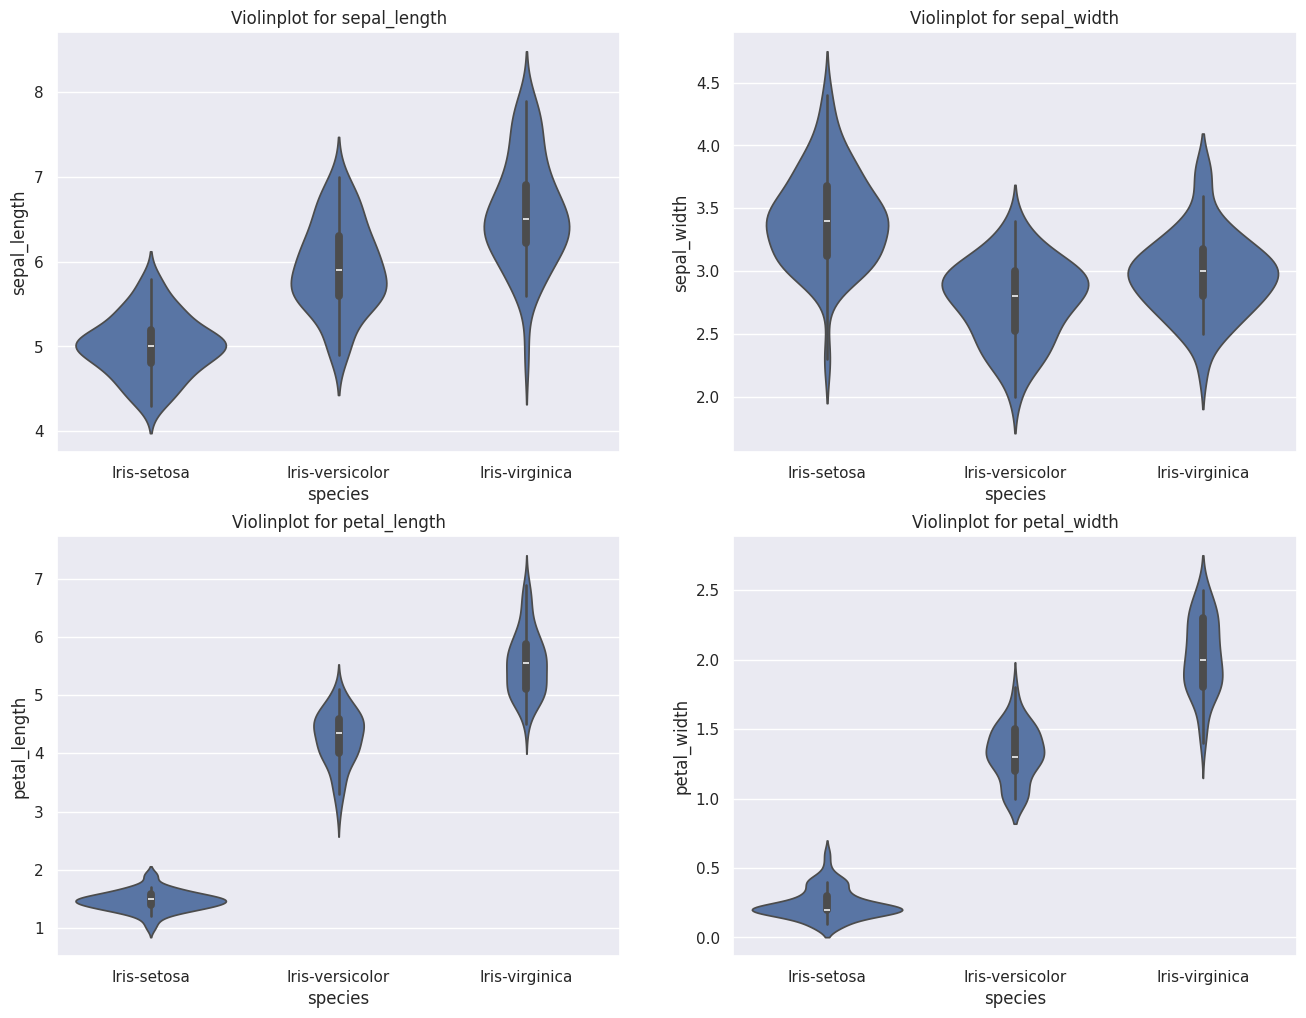

In [18]:
#Violin Plot: Similar to box plot with a deeper visualization
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(16,12))
axes=axes.flatten()
for i,col in enumerate(X.columns):
    sns.violinplot(x='species',y=col,data=df,ax=axes[i])
    axes[i].set_title(f'Violinplot for {col}')

In [19]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

<h3> Scatter Plot</h3>

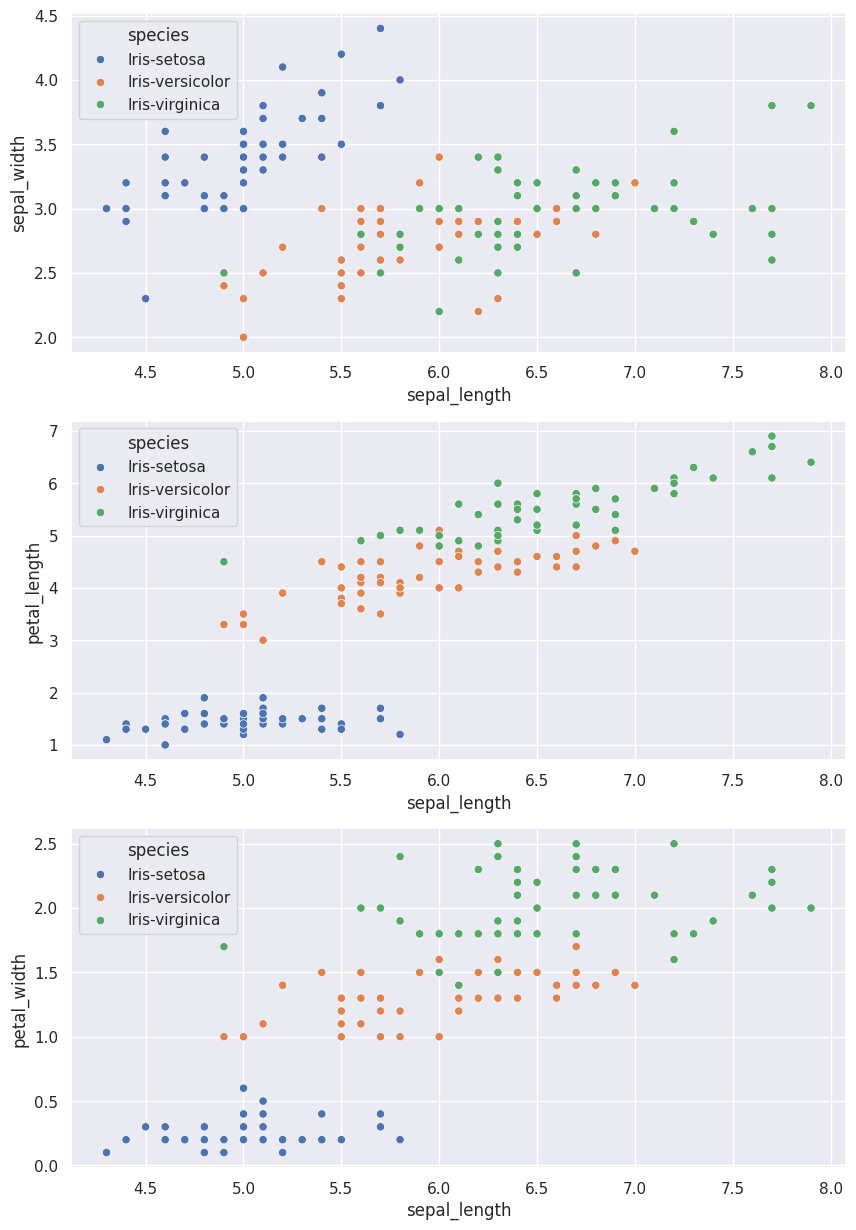

In [20]:
#Scatter plot - Visualize relationship between 2 features
scatter_list=df[['sepal_width', 'petal_length', 'petal_width']]
fig,axes = plt.subplots(nrows=3,ncols=1,figsize=(10,15))
axes=axes.flatten()
for i,col in enumerate(scatter_list):
    sns.scatterplot(x='sepal_length',y=col,data=df,hue='species',ax=axes[i])

<h3> Train - Test - Split</h3>

In [21]:
#Train - test - split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

<h3>Normalization</h3>

In [22]:
#Standard Scaler - helps in gradient descent, makes easy to interpret model coefficients
scaler = StandardScaler()

In [23]:
# Scale the independant variables - in both training and testing data
scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.fit_transform(X_test)

<h2><b>Models : </b></h2><br>
<ul><h3>Logistic Regression</h3>

In [24]:
#Logistic Regression
#train model
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(scaled_train,y_train)
logistic_regression_predictions = logistic_regression_model.predict(scaled_test)

In [26]:
#Decision Tree
#Train model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(scaled_train,y_train)
decision_tree_predictions = decision_tree_model.predict(scaled_test)

In [27]:
random_f = RandomForestClassifier(n_estimators = 100, random_state=42)
random_f.fit(scaled_train,y_train)
random_f_predictions = random_f.predict(scaled_test)

In [28]:
svc = SVC(kernel="linear", random_state=42, C=1)
svc.fit(scaled_train,y_train)
svc_predictions = svc.predict(scaled_test)

In [29]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(scaled_train,y_train)
knn_predictions = knn.predict(scaled_test)

In [30]:
#It expects numerical target variable
label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train)
y_test_numeric = label_encoder.fit_transform(y_test)

In [31]:
xgb = XGBClassifier(random_state=42)
xgb.fit(scaled_train,y_train_numeric)
xgb_predictions = xgb.predict(scaled_test)

In [32]:
nb = GaussianNB()
nb.fit(scaled_train,y_train)
nb_predictions = nb.predict(scaled_test)

<h3>Evaluation Metrics</h3>

In [25]:
#Evaluate
# 1.Logistic Regression
logistic_regression_accuracy = accuracy_score(y_test,logistic_regression_predictions)
logistic_regression_conf_matrix = confusion_matrix(y_test,logistic_regression_predictions)
logistic_regression_classification_rep = classification_report(y_test,logistic_regression_predictions)
print(f"Accuracy: {logistic_regression_accuracy}")
print("\nConfusion Matrix:")
print(logistic_regression_conf_matrix)
print("\nClassification Report:")
print(logistic_regression_classification_rep)

Accuracy: 0.9736842105263158

Confusion Matrix:
[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [33]:
#2. Evaluate Decision Tree
decision_tree_accuracy = accuracy_score(y_test,decision_tree_predictions)
decision_tree_conf_matrix = confusion_matrix(y_test,decision_tree_predictions)
decision_tree_classification_rep = classification_report(y_test,decision_tree_predictions)
print(f'''Accuracy of Decision Tree: {decision_tree_accuracy}
\nConfusion Matrix of Decision Tree: {decision_tree_conf_matrix}
\nClassification Report of Decision Tree: {decision_tree_classification_rep}''')

Accuracy of Decision Tree: 1.0

Confusion Matrix of Decision Tree: [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

Classification Report of Decision Tree:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [34]:
# 3.Evaluate SVC
svc_accuracy = accuracy_score(y_test,svc_predictions)
svc_conf_matrix = confusion_matrix(y_test,svc_predictions)
svc_classification_rep = classification_report(y_test,svc_predictions)
print(f'''
Accuracy of SVC : {svc_accuracy}
\nConfusion Matrix of SVC: {svc_conf_matrix}
\nClassification Rep of SVC : {svc_classification_rep}''')


Accuracy of SVC : 0.9736842105263158

Confusion Matrix of SVC: [[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]

Classification Rep of SVC :                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [35]:
# 4. K Nearest Neighbors
knn_accuracy = accuracy_score(y_test,knn_predictions)
knn_conf_matrix = confusion_matrix(y_test,knn_predictions)
knn_classification_rep = classification_report(y_test,knn_predictions)
print(f''' 
Accuracy of KNN : {knn_accuracy}
\nConfusion Matrix of KNN : {knn_conf_matrix}
\nClassification Rep of KNN : {knn_classification_rep}''')

 
Accuracy of KNN : 1.0

Confusion Matrix of KNN : [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

Classification Rep of KNN :                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [36]:
# 5. Random Forest
random_f_accuracy = accuracy_score(y_test,random_f_predictions)
random_f_conf_matrix = confusion_matrix(y_test,random_f_predictions)
random_f_classification_rep = classification_report(y_test,random_f_predictions)
print(f''' 
Random Forest Accuracy : {random_f_accuracy}
\nConfusion Matrix for Random Forest : {random_f_conf_matrix}
\nClassification Report for Random Forest: {random_f_classification_rep} ''')

 
Random Forest Accuracy : 1.0

Confusion Matrix for Random Forest : [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

Classification Report for Random Forest:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38
 


In [37]:
# 6. XG Boost
xgb_accuracy = accuracy_score(y_test_numeric,xgb_predictions)
xgb_conf_matrix = confusion_matrix(y_test_numeric, xgb_predictions)
xgb_classification_rep = classification_report(y_test_numeric,xgb_predictions)
print(f''' 
Accuracy XGB : {xgb_accuracy}
\nXGB confusion matrix : {xgb_conf_matrix}
\nXGB Classification rep : {xgb_classification_rep}''')

 
Accuracy XGB : 1.0

XGB confusion matrix : [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

XGB Classification rep :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [38]:
# 7. Naive Bayes
nb_accuracy = accuracy_score(y_test,nb_predictions)
nb_conf_matrix = confusion_matrix(y_test,nb_predictions)
nb_classification_rep = classification_report(y_test,nb_predictions)
print(f''' 
Accuracy of Naive Bayes : {nb_accuracy}
\nConfusion Matrix for Naive Bayes : {nb_conf_matrix}
\nClassification report for Naive Bayes : {nb_classification_rep}''')

 
Accuracy of Naive Bayes : 0.9736842105263158

Confusion Matrix for Naive Bayes : [[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]

Classification report for Naive Bayes :                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [39]:
classifiers = ['Logistic Regression', 'Decision Tree' ,  'SVC' ,'KNN','Random Forest', 'XG Boost','Naive Bayes']
predictions = [logistic_regression_predictions,decision_tree_predictions,svc_predictions,knn_predictions,random_f_predictions,xgb_predictions,nb_predictions]
accuracies = [logistic_regression_accuracy,decision_tree_accuracy,svc_accuracy,knn_accuracy,random_f_accuracy,xgb_accuracy,nb_accuracy]
conf_matrices = [logistic_regression_conf_matrix,decision_tree_conf_matrix,svc_conf_matrix,knn_conf_matrix,random_f_conf_matrix,xgb_conf_matrix,nb_conf_matrix]

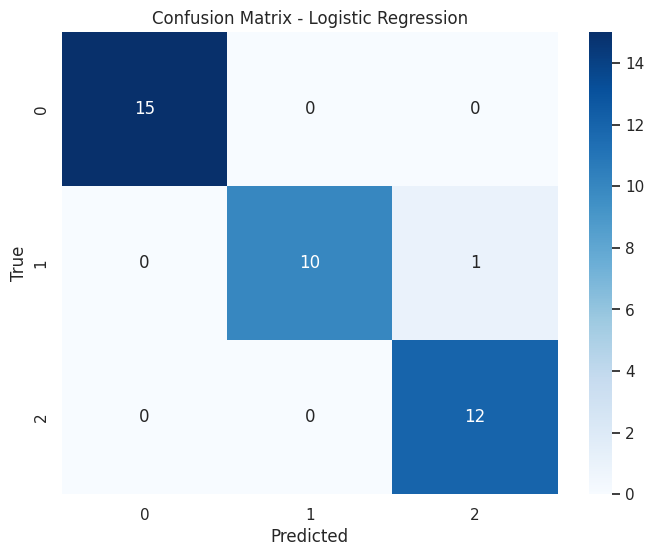

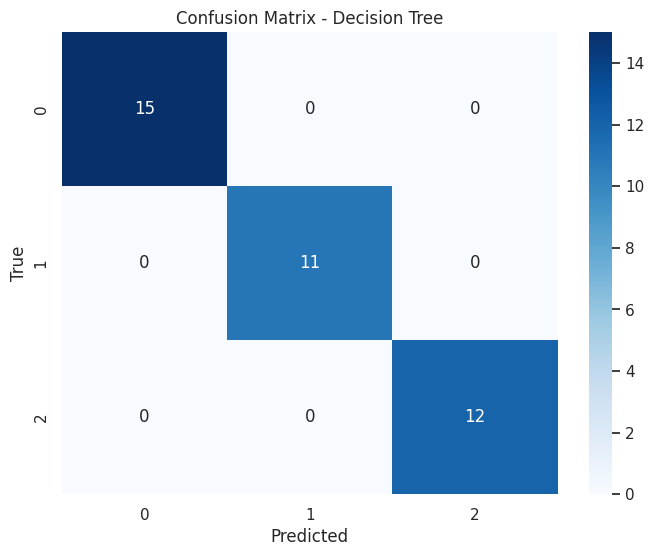

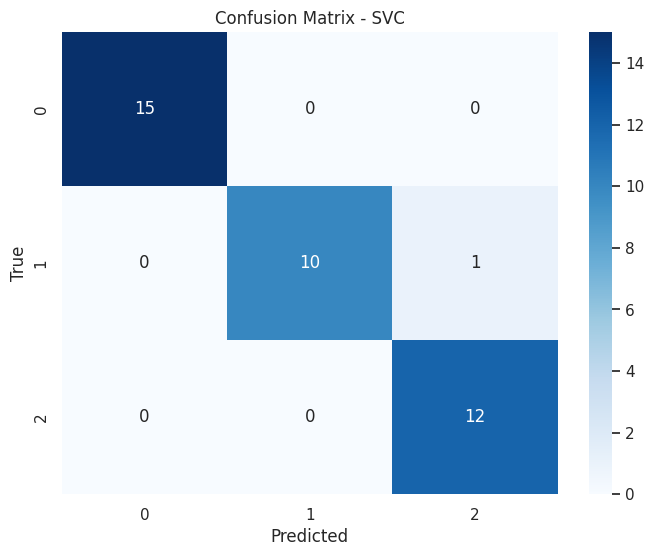

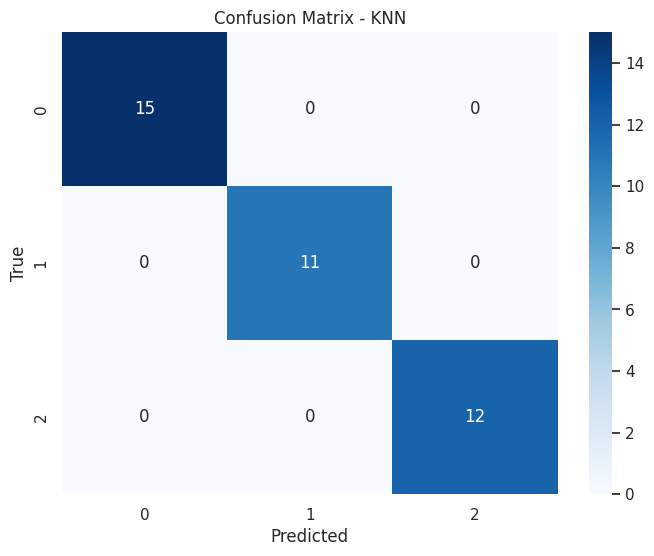

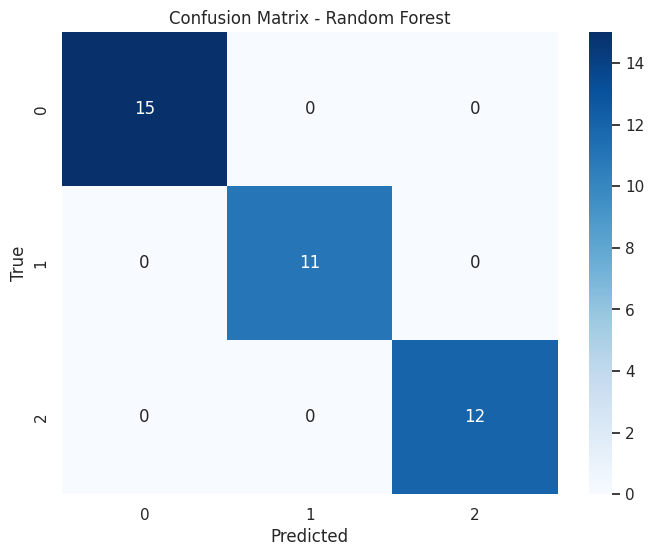

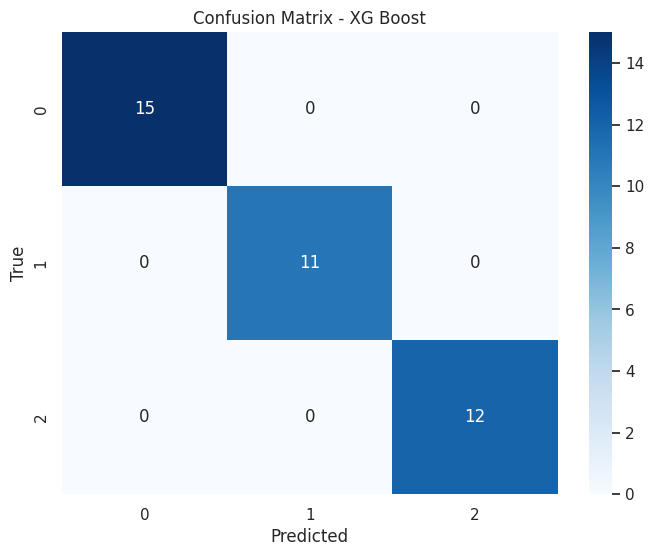

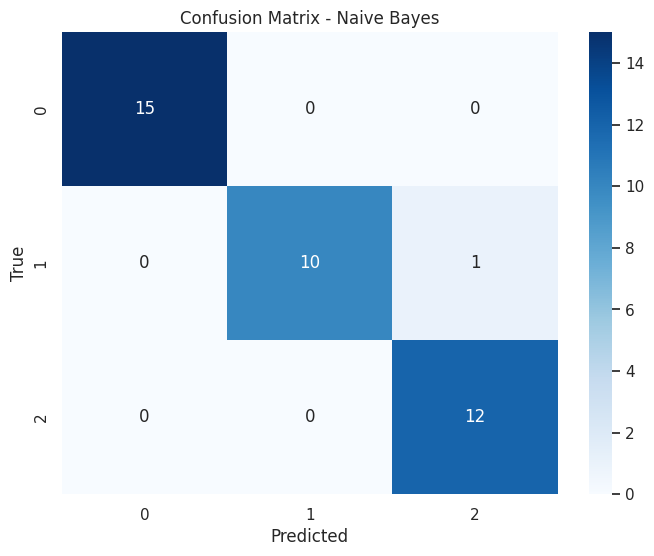

In [40]:
for classes , cm in zip(classifiers,conf_matrices):
     # Visualize Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {classes}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

/tmp/ipykernel_5210/2114491632.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classifiers, y=accuracies, palette='viridis')


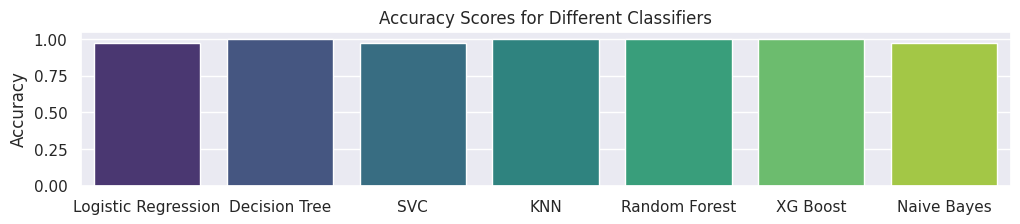

In [41]:
# Visualize Accuracies
plt.figure(figsize=(12, 2))
sns.barplot(x=classifiers, y=accuracies, palette='viridis')
plt.title('Accuracy Scores for Different Classifiers')
plt.ylabel('Accuracy')
plt.show()